Step 1: Importing libraries and Exploring the Dataset.

Step 2: Definining Exploratory Data Analysis with an overview of the whole project .

Step 3: Checking missing values , Outliers & duplicates

Step 4: Creating visual methods to analyze the data.

Step 5: Making Data Preprossing & Cleaning

Step 6: creat a model that fits the data

##Step 1: Importing libraries and Exploring the Dataset

In [46]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#For Fitting
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

%matplotlib inline
#ignore any warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/car_purchasing.csv",encoding='ISO-8859-1')

In [4]:
df.shape

(500, 9)

##Step 2: Definining Exploratory Data Analysis with an overview of the whole project

In [5]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


##Step 3: Checking missing values , Outliers & duplicates


In [10]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [17]:
# check outliers
columns = ['age','annual Salary', 'credit card debt', 'net worth','car purchase amount']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in age: 4
Number of outliers in annual Salary: 2
Number of outliers in credit card debt: 7
Number of outliers in net worth: 1
Number of outliers in car purchase amount: 3


##Step 4: Creating visual methods to analyze the data

<Axes: xlabel='net worth', ylabel='Count'>

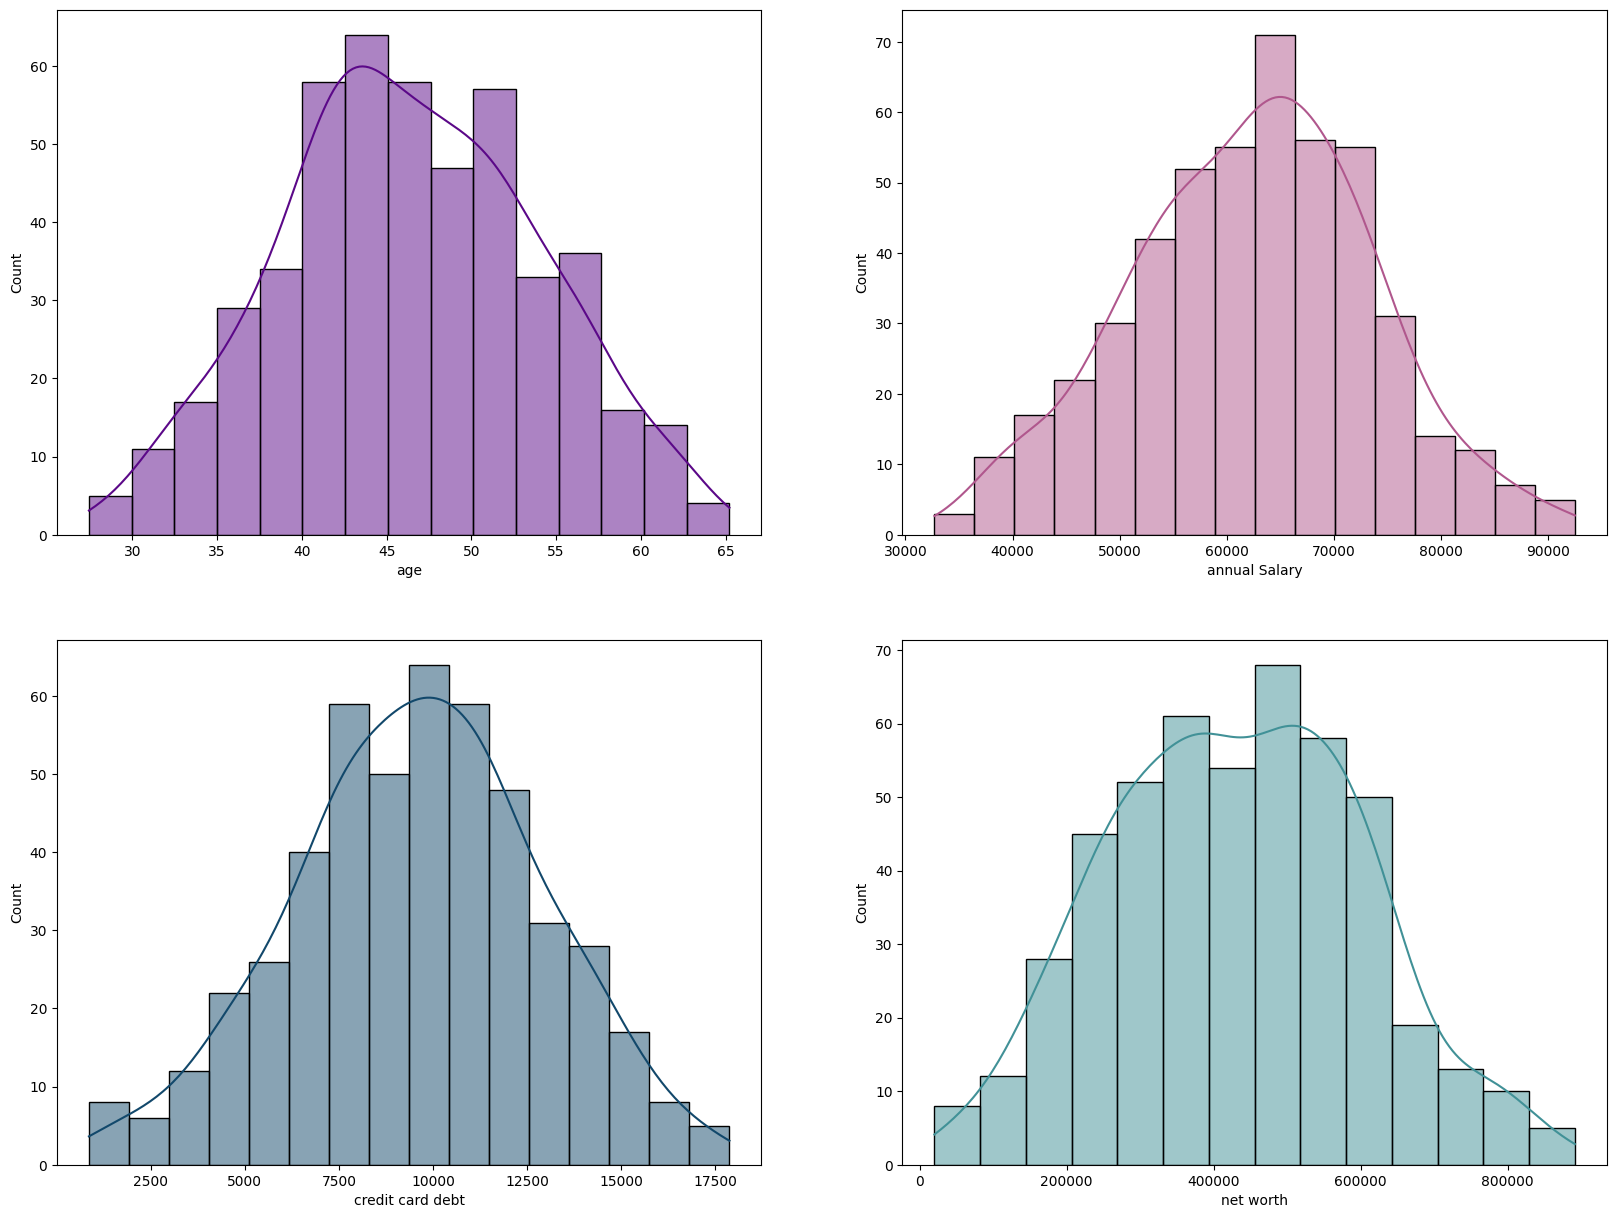

In [24]:
##histogram
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.histplot(df["age"], kde=True,color="#5B0888")
plt.subplot(2, 2, 2)
sns.histplot(df["annual Salary"], kde=True,color="#B0578D")
plt.subplot(2, 2, 3)
sns.histplot(df["credit card debt"], kde=True,color="#12486B")
plt.subplot(2, 2, 4)
sns.histplot(df["net worth"], kde=True,color="#419197")

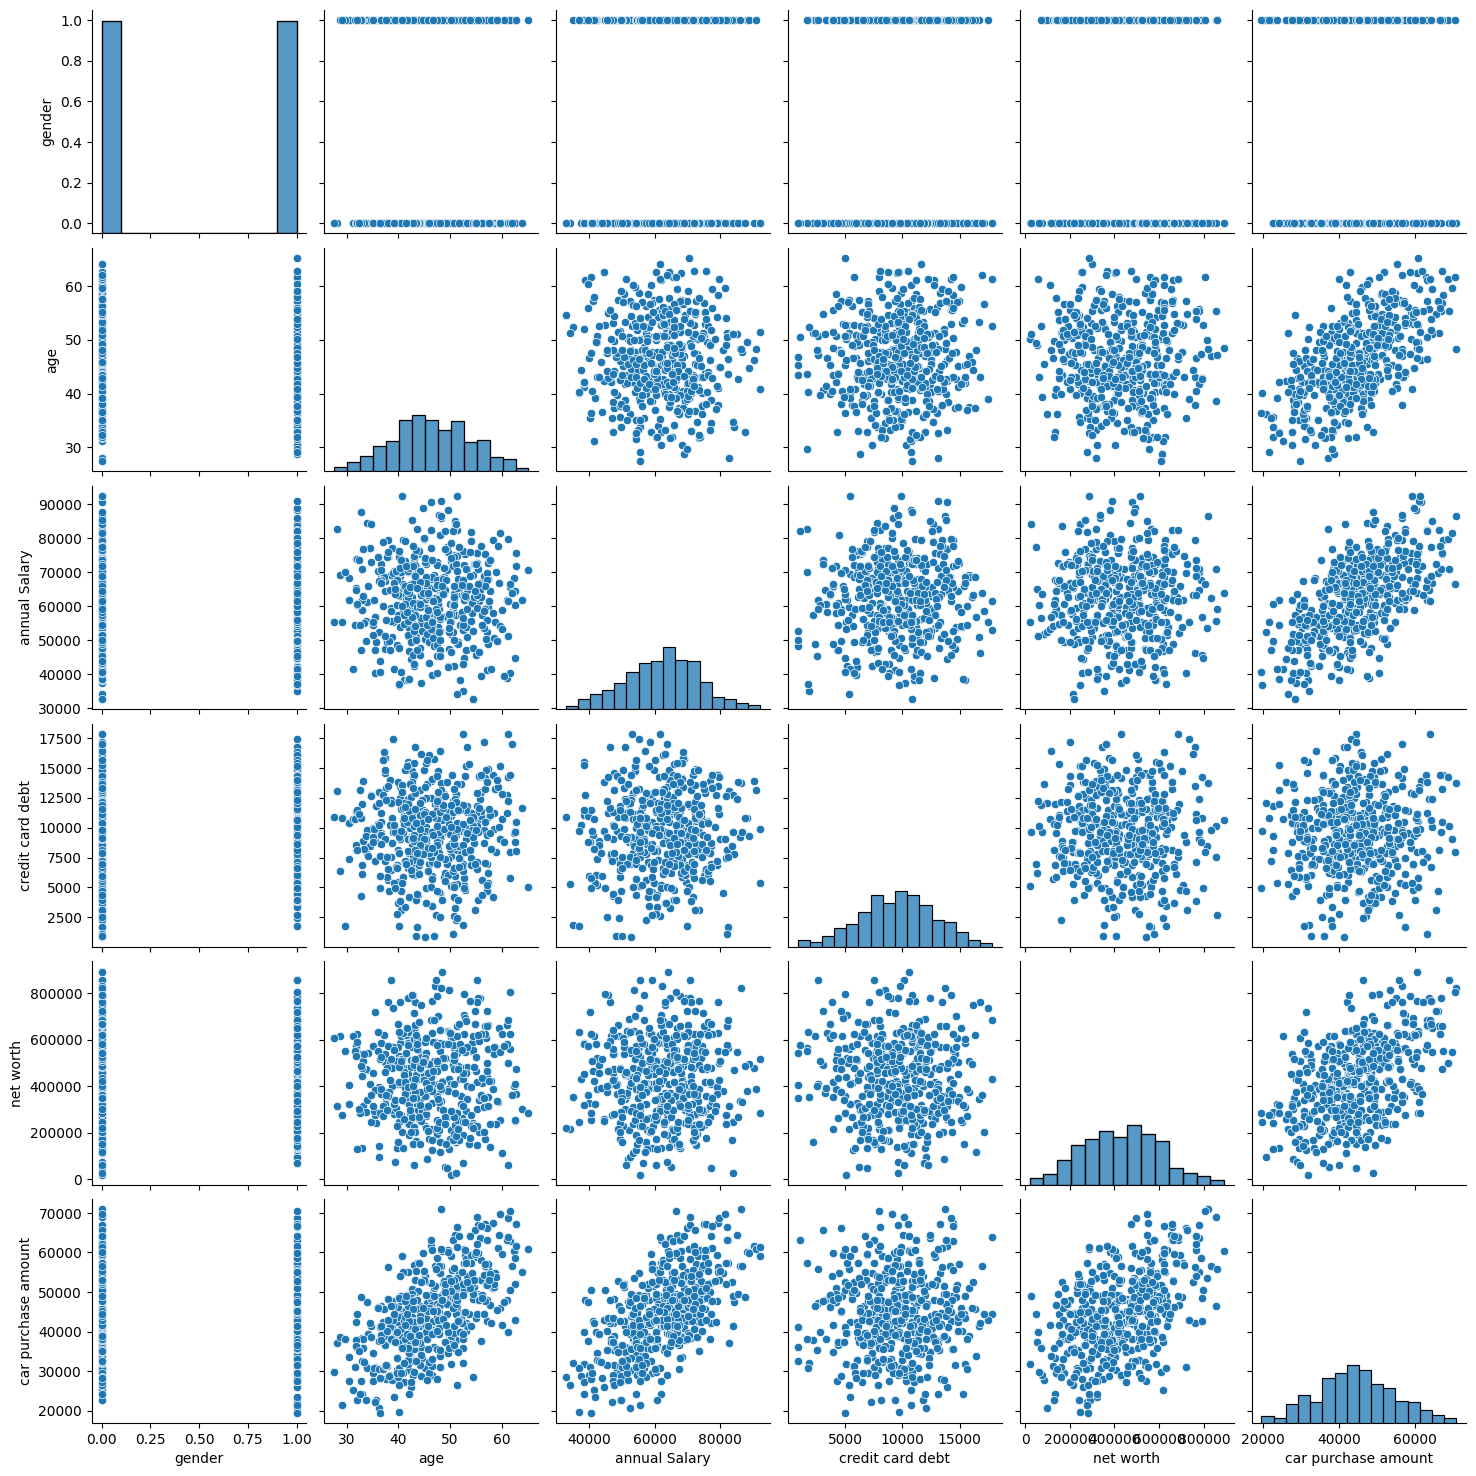

In [25]:
sns.pairplot(data = df)

<Axes: >

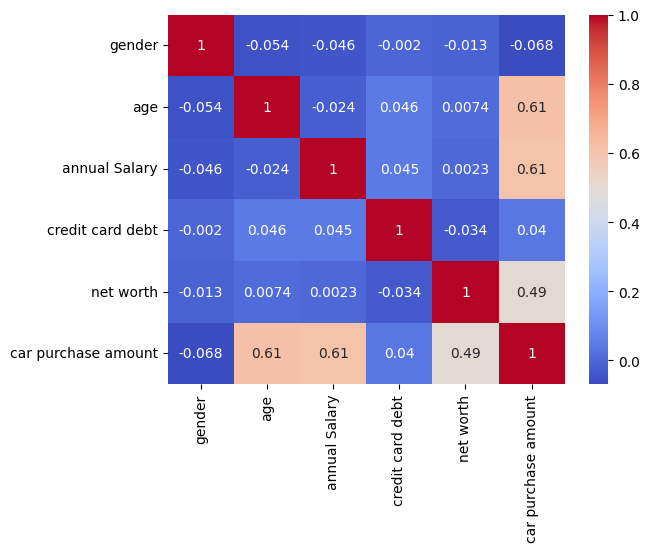

In [26]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True) #strong relatiion between columns

In [27]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [28]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'],inplace=True)

Text(0.5, 1.0, 'the corr between credit card debt and car purchase amount')

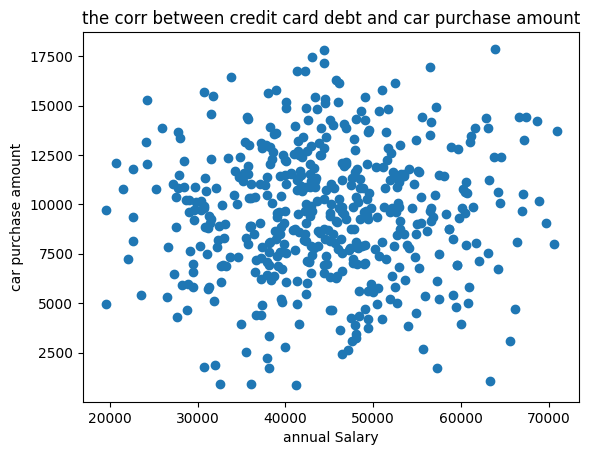

In [30]:
#Create a Scatter plot to show the distrbution between 'credit card debt' and 'car purchase amount'

plt.scatter(df['car purchase amount'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('car purchase amount')
plt.title('the corr between credit card debt and car purchase amount')

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

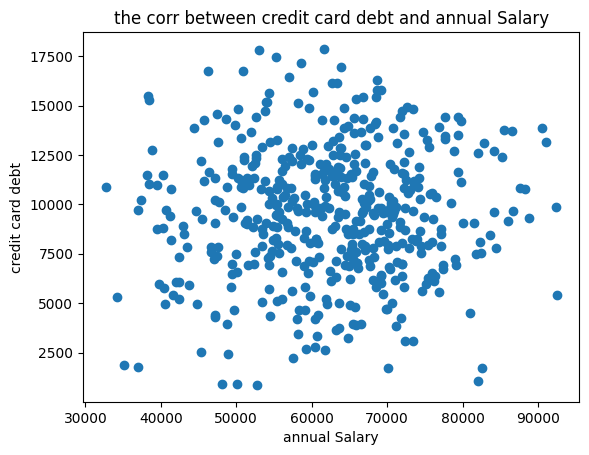

In [29]:
#Create a Scatter plot to show the distrbution between 'credit card debt' and 'annual Salary'

plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the corr between credit card debt and annual Salary')

##Step 6: creat a model that fits the data

In [35]:
X=df.drop(columns=['car purchase amount'])
y=df['car purchase amount']

In [36]:
#sacle our data
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1 , 1))

In [38]:
#Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 12)

In [47]:
linear =LinearRegression()
#fitting the data to get the thetas
linear.fit(x_train, y_train)

#fitting the data to get the thetas
linear.fit(x_train, y_train)

y_pred_train=linear.predict(x_train)

In [48]:
##accuracy of traning data
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred_train,y_train))
print("MAE:",metrics.mean_absolute_error(y_pred_train,y_train))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred_train,y_train)))
print("r2_score:",metrics.r2_score(y_pred_train,y_train))

MSE: 8.065367062868554e-10
MAE: 2.257169347194123e-05
RMSE: 2.8399589896455468e-05
r2_score: 0.999999980322065


In [49]:
y_pred = linear.predict(x_test)

In [50]:
#accuracy of test data
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 9.503698466699121e-10
MAE: 2.4705316786542024e-05
RMSE: 3.082806913625815e-05
r2_score: 0.9999999726756024
